In [2]:
#Administrators and Superintendent Salary-2016 data

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

admin_sal_to_load = "NJ Dept of Edu Admin Sal 2016 17.csv"
admin_sal_data = pd.read_csv(admin_sal_to_load)
admin_sal_df = pd.DataFrame(admin_sal_data)
admin_sal_df.head()

,COUNTY_ID,CONAME,EMP_DISTRICT_ID,DISTNAME,EMP_NAME,EMP_JOB_TITLE,EMP_JOB_TITLE_2,EMP_BASE_SALARY,EMP_FTE,EMP_SHARED,...,TOTAL_REMUNERATION,BUYBACK_SICK_TIME_IN_CASH,BUYBACK_VACATION_TIME_IN_CASH,BUYBACK_PERSONAL_TIME_IN_CASH,OTHER_REMUNERATION_1,OTHER_REMUNERATION_2,OTHER_REMUNERATION_3,ADDITIONAL_COMMENT_1,ADDITIONAL_COMMENT_2,ADDITIONAL_COMMENT_3
0,1,ATLANTIC,10,ABSECON CITY,Allen Suhr,Coordinator/Director/Manager/Supervisor,Director of Facilities,"$87,781",1.0,N,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ATLANTIC,10,ABSECON CITY,Scott Sarraiocco,Coordinator/Director/Manager/Supervisor,Curriculum/Technology,"$98,377",1.0,N,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,ATLANTIC,10,ABSECON CITY,Theresa DeFranco,Superintendent,NaN,"$145,000",1.0,N,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,ATLANTIC,10,ABSECON CITY,Tina Davisson,Business Administrator,Board Secretary,"$105,033",1.0,N,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,ATLANTIC,110,ATLANTIC CITY,ANGELA BROWN,Secretary,NaN,"$92,954",1.0,N,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Select the coloumns we need
admin_sal_df = admin_sal_df[["DISTNAME","EMP_JOB_TITLE","EMP_BASE_SALARY"]]
#To get the first part of the DISTNAME column
admin_sal_df["DISTNAME"] = admin_sal_df["DISTNAME"].apply(lambda x: x.split()[0])
#To get the five cities data
salary_data = admin_sal_df[admin_sal_df["DISTNAME"].isin(["SUMMIT","PRINCETON","HOBOKEN","CLIFTON","BRIDGETON"])]
#To get salary data for administrator and superintendent
salary_data_super = salary_data[salary_data["EMP_JOB_TITLE"].str.contains("Superintendent")].copy()
salary_data_admin = salary_data[salary_data["EMP_JOB_TITLE"].str.contains("Administrator")].copy()
#To select just the number part from EMP_BASE_SALARY(to remove $ sign)
salary_data_admin["EMP_BASE_SALARY"] = salary_data_admin["EMP_BASE_SALARY"].apply(lambda x: float(x[1:].replace(",","")))
salary_data_super["EMP_BASE_SALARY"] = salary_data_super["EMP_BASE_SALARY"].apply(lambda x: float(x[1:].replace(",","")))



salary_data_admin



,DISTNAME,EMP_JOB_TITLE,EMP_BASE_SALARY
1136,BRIDGETON,Assistant Business Administrator,100734.0
1140,BRIDGETON,Business Administrator,148458.0
1758,HOBOKEN,Assistant Business Administrator,84000.0
1762,HOBOKEN,Business Administrator,139080.0
2044,PRINCETON,Business Administrator,180826.0
3015,CLIFTON,Assistant Business Administrator,107164.0
3019,CLIFTON,Business Administrator,168522.0
3675,SUMMIT,Assistant Business Administrator,106594.0
3680,SUMMIT,Business Administrator,189231.0


In [4]:
#To get the mean Admistrator Salary 
                                                                                                       
salary_data_admin_mean = salary_data_admin.groupby("DISTNAME").mean()
admin_salary = salary_data_admin_mean.rename(columns={"EMP_BASE_SALARY": "Admin_mean_salary"})

admin_salary

,Admin_mean_salary
DISTNAME,
BRIDGETON,124596.0
CLIFTON,137843.0
HOBOKEN,111540.0
PRINCETON,180826.0
SUMMIT,147912.5


In [5]:
#To get the mean Superintendent Salary
                                                                                                       
salary_data_super_mean = salary_data_super.groupby("DISTNAME").mean()
super_salary = salary_data_super_mean.rename(columns={"EMP_BASE_SALARY": "Super_mean_salary"})
super_salary

,Super_mean_salary
DISTNAME,
BRIDGETON,159485.0
CLIFTON,171854.0
HOBOKEN,153634.5
PRINCETON,169929.0
SUMMIT,164996.5


In [6]:
#Combined Admin and Super
combined_salary = admin_salary.join(super_salary)
combined_salary = combined_salary.rename_axis("City")
combined_salary

,Admin_mean_salary,Super_mean_salary
City,,
BRIDGETON,124596.0,159485.0
CLIFTON,137843.0,171854.0
HOBOKEN,111540.0,153634.5
PRINCETON,180826.0,169929.0
SUMMIT,147912.5,164996.5


In [7]:
pop_grad_df = pd.read_csv("pop_grad_data.csv")
pop_grad_df = pop_grad_df[["DISTRICT_NAME_left","GRAD_RATE","Population"]]
pop_grad_df = pop_grad_df.rename(columns={"DISTRICT_NAME_left": "City"})
pop_grad_df.to_csv("graduation_data.csv")

In [8]:
pop_grad_sal_df = pop_grad_df.set_index("City").join(combined_salary)
#To sort
pop_grad_sal_df =pop_grad_sal_df.sort_values(by='City', ascending=False)
pop_grad_sal_df

,GRAD_RATE,Population,Admin_mean_salary,Super_mean_salary
City,,,,
SUMMIT,96.09,22238.0,147912.5,164996.5
PRINCETON,94.85,31415.0,180826.0,169929.0
HOBOKEN,86.01,55044.0,111540.0,153634.5
CLIFTON,83.79,86414.0,137843.0,171854.0
BRIDGETON,78.78,24817.0,124596.0,159485.0


Text(0.5,1,'Administrators Salary Vs Graduation Rate')

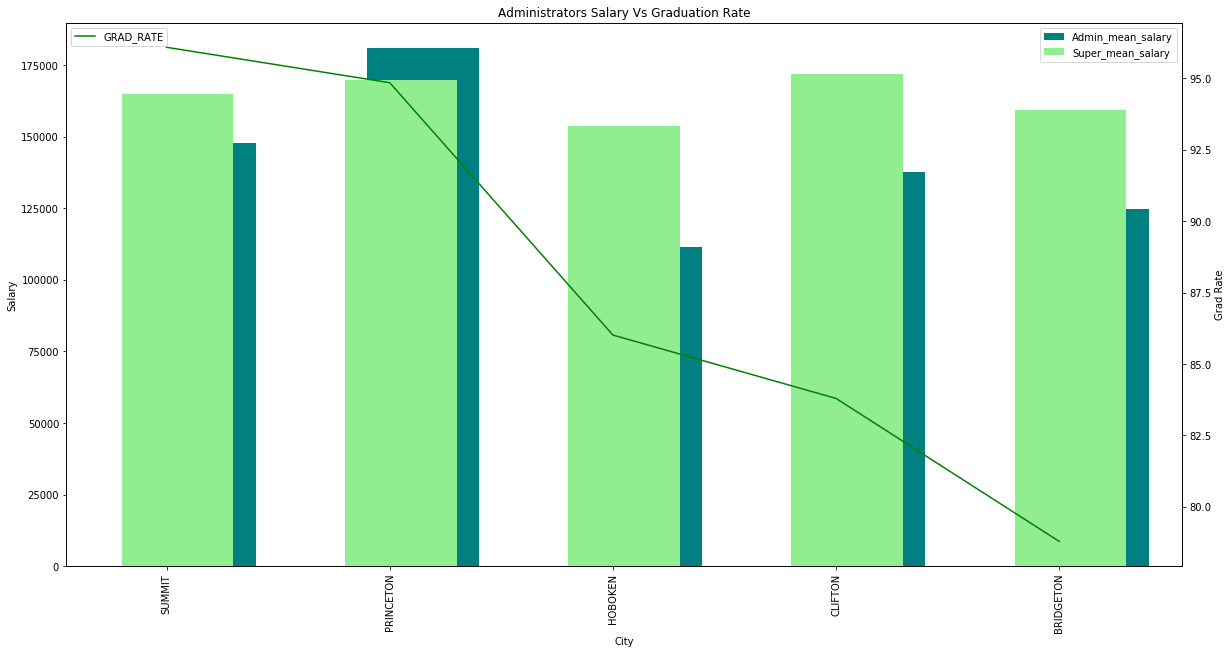

In [17]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111)
ax.set_ylabel("Salary")
ax2 = ax.twinx()
ax2.set_ylabel("Grad Rate")
pop_grad_sal_df.Admin_mean_salary.plot(kind="bar", ax=ax, position=.2, color='teal', legend=True)
pop_grad_sal_df.Super_mean_salary.plot(kind="bar", ax=ax, position=.4, color='lightgreen', legend=True)
pop_grad_sal_df.GRAD_RATE.plot(kind="line", ax=ax2, color='green', legend=True).legend(loc="upper left")
ax.set_title("Administrators Salary Vs Graduation Rate")
